# **Main Goal: Create an CNN that can detect "hot spots" from thermal images**

# **Get The Data**

In [126]:
#Import The Essentials

#Import Modules
import tensorflow as tf
import numpy as np
from tensorflow import keras

#Import Pillow Image Tools
import PIL
import PIL.Image

#Display Version of TensorFlow
print("TensorFlow Version:", tf.__version__)

#Print Number of GPUs being Used
print("The Number of GPUs Available is: ", len(tf.config.list_physical_devices('GPU')))

TensorFlow Version: 2.7.0
The Number of GPUs Available is:  1


In [127]:
#Load The Dataset

#Allow Google Colab to Access Files
from google.colab import files

#Names Dataset "data"
data = files.upload()

#Confirms Upload
for fn in data.keys():
  print('\nUser uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(data[fn])))

#Unzip Data
from zipfile import ZipFile

with ZipFile('cnn_dataset.zip', 'r') as unzipped_data:
  unzipped_data.extractall('/content/data')

print('\nThe data was successfully unzipped! See the unzipped data below:')

#Confirm that Data was Unzipped
!ls '/content/data'

#Message If Folder Isn't Showing:
print('\nIf you cannot see the folder in the directory list, hit the directory refresh button (middle button)')

#Delete the Original .zip File
!rm cnn_dataset.zip
print('\nThe original zip file has been deleted to free up space within the environment.')

Saving cnn_dataset.zip to cnn_dataset.zip

User uploaded file "cnn_dataset.zip" with length 46103444 bytes

The data was successfully unzipped! See the unzipped data below:
cnn_dataset  __MACOSX

If you cannot see the folder in the directory list, hit the directory refresh button (middle button)

The original zip file has been deleted to free up space within the environment.


In [128]:
#Create The Class List
class_names = ['no_fire', 'small_fire', 'large_fire', 'multiple_fires']

### Source for the following cells: https://www.tensorflow.org/tutorials/load_data/images

In [129]:
#Get the Dataset Working
import pathlib
dataset = '/content/data/cnn_dataset'
fire_data = pathlib.Path(dataset)

In [130]:
#Figure Out Number of Images in Dataset
image_count = len(list(fire_data.glob('*/*.jpg')))
print(image_count)

3396


In [131]:
#Create A Dataset

#Define Parameters
batch_size = 10000
img_height = 64
img_width = 64

In [132]:
#Create the Training Dataset
training_set = tf.keras.utils.image_dataset_from_directory(
    fire_data,
    validation_split = 0.25,
    subset = 'training',
    seed = 123,
    image_size = (img_height, img_width), 
    batch_size=batch_size
)

Found 3396 files belonging to 4 classes.
Using 2547 files for training.


In [133]:
#Create the Testing Dataset
testing_set = tf.keras.utils.image_dataset_from_directory(
    fire_data,
    validation_split = 0.25,
    subset = 'validation',
    seed = 123,
    image_size = (img_height, img_width), 
    batch_size=batch_size
)

Found 3396 files belonging to 4 classes.
Using 849 files for validation.


In [134]:
#ImageAugmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#ImageDataGenerator??

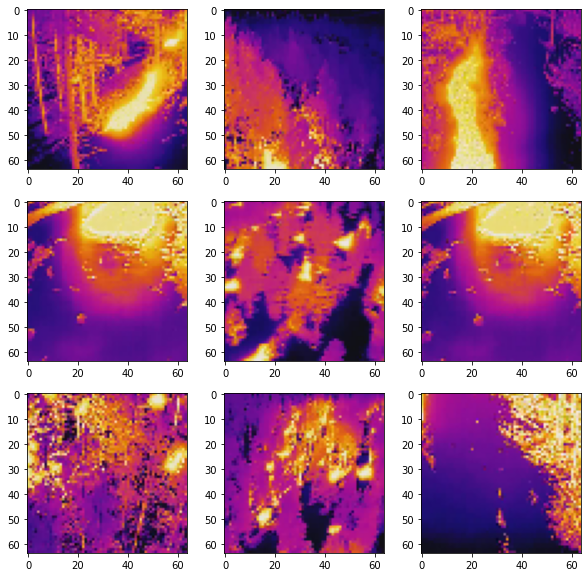

In [135]:
#Import MatPlotLib
import matplotlib.pyplot as plt

#Plot First 9 Images from Training Dataset
plt.figure(figsize=(10, 10))
for images, labels in training_set.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))

# Convert Training Set To NumPy Arrays

Video Tutorial Link: https://www.youtube.com/watch?v=7ZOIbkA9eqI

In [136]:
#Import Essentials
import tensorflow_datasets as tfds

In [137]:
#Converting the Images
x_train = None

for image, labels in tfds.as_numpy(training_set):
  print(type(image))
  x_train = image

x_train.shape

<class 'numpy.ndarray'>


(2547, 64, 64, 3)

In [138]:
#Converting the Labels
y_train = None

for image, labels in tfds.as_numpy(training_set):
  type(labels)
  y_train = labels

y_train.shape

(2547,)

In [139]:
#Changing the Image Type from "unit8" to "float32"
x_train = x_train.astype('float32')/255

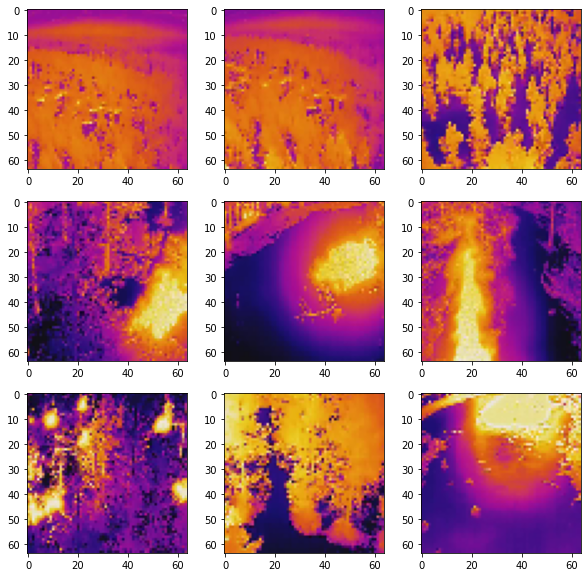

In [140]:
#Plotting Images To See if Successful

#Change Size of Images in Plot
plt.figure(figsize=(10, 10))

#For Loop to Plot Images
for i in range(9):  
  
  #Define Subplot
  plt.subplot(3, 3, i+1)

  #Plot Raw Image Pixel Data
  plt.imshow(x_train[i])

#Show Images
plt.show()

# Converting Testing Set to NumPy Arrays

In [141]:
#Converting the Images
x_test = None

for image, labels in tfds.as_numpy(testing_set):
  print(type(image))
  x_test = image
   
x_test.shape

<class 'numpy.ndarray'>


(849, 64, 64, 3)

In [142]:
#Converting the Labels
y_test = None

for image, labels in tfds.as_numpy(testing_set):
  type(labels)
  y_test = labels

y_test.shape

(849,)

In [143]:
#Changing the Image Type from "unit8" to "float32"
x_test = x_test.astype('float32')/255

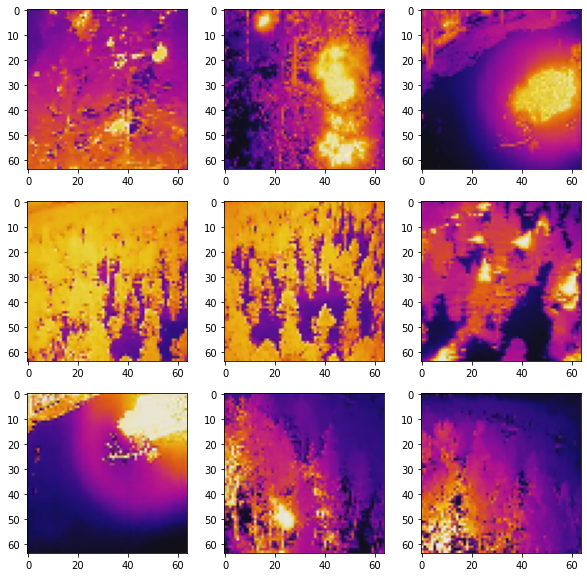

In [144]:
#Plotting Images To See if Successful

#Change Size of Images in Plot
plt.figure(figsize=(10, 10))

#For Loop to Plot Images
for i in range(9):  
  
  #Define Subplot
  plt.subplot(3, 3, i+1)

  #Plot Raw Image Pixel Data
  plt.imshow(x_test[i])

#Show Images
plt.show()

# Grayscale The Images of the Whole Dataset

The Shape of the NumPy Training Set is:  (2547, 64, 64, 1)
The Shape of the NumPy Testing Set is:  (849, 64, 64, 1)


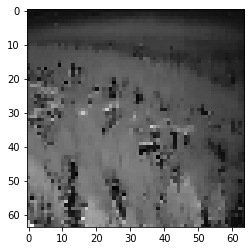

In [ ]:
#Grayscale Training and Testing Sets
grayscale_x_train = tf.image.rgb_to_grayscale(x_train[:])
grayscale_x_test = tf.image.rgb_to_grayscale(x_test[:])

#Convert to NumPy Arrays and Check Shapes
grayscale_x_train = grayscale_x_train.numpy()
print('The Shape of the NumPy Training Set is: ', grayscale_x_train.shape)

grayscale_x_test = grayscale_x_test.numpy()
print('The Shape of the NumPy Testing Set is: ', grayscale_x_test.shape)

#Display the First Image of the Training Set
gray_image = tf.image.rgb_to_grayscale(x_train[1])
plt.imshow (tf.squeeze(gray_image), cmap = 'gray')

#The Testable Model Blueprint...

ValueError: ignored

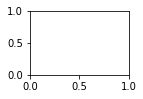

In [148]:
train_datagen = ImageDataGenerator(
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  rescale=1./255,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  fill_mode='nearest')
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

train_gen = train_datagen.image_dataset_from_directory(
    training_set,
    
)

In [ ]:
#Convolutional Neural Network
cnn = tf.keras.Sequential([
      
    #Convolutional Layer #1
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (2, 2), strides = (1, 1), activation = 'relu', padding = 'same', input_shape = (64, 64, 1)),

    #Pooling Layer #1
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same'),

    #Convolutional Layer #2
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (2, 2), activation = 'relu', padding = 'same'),

    #Pooling Layer #2
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (1, 1), padding = 'same'),

    #Flatten Output
    tf.keras.layers.Flatten(),

    #Dense Layer #1
    tf.keras.layers.Dense(64, activation = 'relu'),

    #Dropout
    tf.keras.layers.Dropout(0.5),

    #Dense Layer #2
    tf.keras.layers.Dense(4, activation = 'softmax'),

])

In [ ]:
#Learning Schedule
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9
)

#Compile The Model
cnn.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
#Model Summary
cnn.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 64, 64, 32)        160       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 32, 32, 64)        8256      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 flatten_14 (Flatten)        (None, 65536)             0         
                                                                 
 dense_28 (Dense)            (None, 64)              

In [ ]:
#Train The Model
EPOCHS = 30
history = cnn.fit(
    grayscale_x_train, y_train,
    batch_size = 50, epochs = EPOCHS, validation_split = 0.1, verbose = 1,
)

Epoch 1/30
46/46 [==============================] - 2s 23ms/step - loss: 1.2709 - accuracy: 0.4324 - val_loss: 1.2599 - val_accuracy: 0.4745
Epoch 2/30
46/46 [==============================] - 1s 16ms/step - loss: 1.2721 - accuracy: 0.4315 - val_loss: 1.2613 - val_accuracy: 0.4745
Epoch 3/30
46/46 [==============================] - 1s 16ms/step - loss: 1.2697 - accuracy: 0.4289 - val_loss: 1.2610 - val_accuracy: 0.4745
Epoch 4/30
46/46 [==============================] - 1s 16ms/step - loss: 1.2650 - accuracy: 0.4328 - val_loss: 1.2606 - val_accuracy: 0.4745
Epoch 5/30
46/46 [==============================] - 1s 17ms/step - loss: 1.2642 - accuracy: 0.4315 - val_loss: 1.2603 - val_accuracy: 0.4745
Epoch 6/30
46/46 [==============================] - 1s 16ms/step - loss: 1.2653 - accuracy: 0.4332 - val_loss: 1.2622 - val_accuracy: 0.4745
Epoch 7/30
46/46 [==============================] - 1s 16ms/step - loss: 1.2647 - accuracy: 0.4306 - val_loss: 1.2559 - val_accuracy: 0.4745
Epoch 8/30
46

In [ ]:
#Evaluate The Model
test_loss, test_acc = cnn.evaluate(grayscale_x_test, y_test, verbose = 1)
print('The Test Set Loss is: {0:0.4f} and the Test Set Accuracy is: {1:0.4}%'.format(test_loss, 100*test_acc))

KeyboardInterrupt: ignored

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 13, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt


27/27 [==============================] - 0s 7ms/step - loss: 1.2666 - accuracy: 0.4511
The Test Set Loss is: 1.2666 and the Test Set Accuracy is: 45.11%


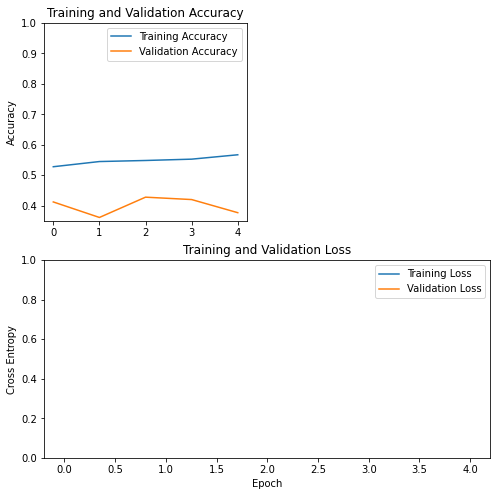

In [ ]:
#Import MatPlotLib
import matplotlib.pyplot as plt

#Define Variables
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

#Plot First Graph
plt.figure(figsize = (8, 8))
plt.subplot(2, 2, 1)
plt.plot(acc, label = "Training Accuracy")
plt.plot(val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'upper right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy')

#Plot the Second Graph
plt.subplot(2, 1, 2)
plt.plot(loss, label = 'Training Loss')
plt.plot(val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0, 1.0])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()

The model predicts the following image to be a member of Class 2 which, when uncoded, represents the large_fire.


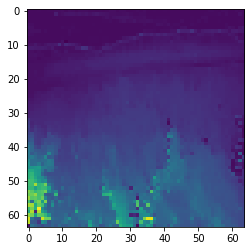

In [ ]:
#Make Prediction
prediction = cnn.predict(grayscale_x_test[360].reshape(1, 64, 64, 1))
np_predict = np.argmax(prediction)
print("The model predicts the following image to be a member of Class {}".format(np_predict) + " which, when uncoded, represents the {}".format(class_names[2]) + '.')

#Show Image
plt.imshow(grayscale_x_test[360].reshape(64, 64))